In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset_0.csv")

In [3]:
df.head()

,result_output,season_teams_count,position_class_team_1,position_class_team_2,diff_points_class,team_1_xg90_performance,team_2_xg90_performance,team_1_xga90_performance,team_2_xga90_performance,team_1_tsr_avg,...,odds_open_win1,odds_open_draw,odds_open_win2,odds_open_tm25,odds_open_tb25,odds_close_win1,odds_close_draw,odds_close_win2,odds_close_tm25,odds_close_tb25
0,1,28,A,G,F1,1.833563,1.161550,1.046711,1.457889,56.543316,...,1.312,6.50,8.60,3.15,1.386,1.296,6.48,8.86,3.49,1.321
1,2,28,H,E,D2,0.953167,1.198348,1.857064,1.522911,42.499000,...,2.010,3.93,3.61,2.22,1.714,2.480,3.62,2.87,2.11,1.781
2,X,28,D,D,B2,1.238412,1.513718,1.082048,1.359203,55.562040,...,1.751,4.24,4.47,2.29,1.675,1.934,3.96,3.84,2.31,1.666
3,X,28,H,C,E2,1.396592,1.342391,1.985973,1.023910,48.428135,...,2.600,3.64,2.72,2.37,1.636,2.770,3.58,2.58,2.20,1.724
4,1,28,E,E,A1,1.444847,1.322419,1.422922,1.547253,52.301826,...,1.735,4.59,4.24,2.61,1.523,1.606,4.62,5.20,3.01,1.414


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66008 entries, 0 to 66007
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   result_output                   66008 non-null  object 
 1   season_teams_count              66008 non-null  int64  
 2   position_class_team_1           66008 non-null  object 
 3   position_class_team_2           66008 non-null  object 
 4   diff_points_class               66008 non-null  object 
 5   team_1_xg90_performance         66007 non-null  float64
 6   team_2_xg90_performance         66008 non-null  float64
 7   team_1_xga90_performance        66007 non-null  float64
 8   team_2_xga90_performance        66008 non-null  float64
 9   team_1_tsr_avg                  65966 non-null  float64
 10  team_2_tsr_avg                  65966 non-null  float64
 11  team1_all_classic_xgsh          65988 non-null  float64
 12  team1_all_classic_xgash         

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Dataset_0.csv')

# Drop missing values
df = df.dropna()

# Split the data into input features and target variable
X = df.iloc[:, :-10].drop('result_output', axis=1)
df['result_output'] = label_encoder.fit_transform(df['result_output'])
y = df['result_output']

# Scale the numerical features
num_features = ['season_teams_count', 'team_1_xg90_performance', 'team_2_xg90_performance',
                'team_1_xga90_performance', 'team_2_xga90_performance', 'team_1_tsr_avg', 'team_2_tsr_avg',
                'team1_all_classic_xgsh', 'team1_all_classic_xgash', 'team1_all_classic_gdxgd', 'team1_all_classic_wins',
                'team1_all_classic_draw', 'team1_all_classic_defeat', 'team1_all_xg90_draw_xgxga',
                'team1_all_xg90_zero_xgxga', 'team1_all_xg90_com_xgxga', 'team2_all_classic_xgd', 'team2_all_classic_gdxgd',
                'team2_all_classic_xp', 'team2_all_classic_minutes', 'team2_all_xg90_draw_xga90',
                'team2_all_xg90_draw_xgxga', 'team2_all_xg90_cxp_xg90', 'team2_all_xg90_cop_xg90', 'team2_all_five_draw_xg90',
                'team_1_points_difference4', 'team_2_points_difference4', 'team_1_xg90_performance_diff4',
                'team_2_xg90_performance_diff4', 'team_1_xga90_performance_diff4', 'team_2_xga90_performance_diff4',
                'team_1_lucky_l4', 'team_2_lucky_l4']

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

# One-hot encode the categorical features
cat_features = ['position_class_team_1', 'position_class_team_2', 'diff_points_class']

encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('encoder', encoder, cat_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32)


<ipython-input-5-e0044592d3b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result_output'] = label_encoder.fit_transform(df['result_output'])


Epoch 1/30
1576/1576 [==============================] - 7s 4ms/step - loss: 1.0420 - accuracy: 0.4739
Epoch 2/30
1576/1576 [==============================] - 10s 6ms/step - loss: 1.0246 - accuracy: 0.4894
Epoch 3/30
1576/1576 [==============================] - 8s 5ms/step - loss: 1.0217 - accuracy: 0.4923
Epoch 4/30
1576/1576 [==============================] - 10s 6ms/step - loss: 1.0200 - accuracy: 0.4922
Epoch 5/30
1576/1576 [==============================] - 6s 4ms/step - loss: 1.0186 - accuracy: 0.4937
Epoch 6/30
1576/1576 [==============================] - 4s 3ms/step - loss: 1.0178 - accuracy: 0.4938
Epoch 7/30
1576/1576 [==============================] - 3s 2ms/step - loss: 1.0162 - accuracy: 0.4945
Epoch 8/30
1576/1576 [==============================] - 3s 2ms/step - loss: 1.0144 - accuracy: 0.4963
Epoch 9/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0136 - accuracy: 0.4979
Epoch 10/30
1576/1576 [==============================] - 4s 2ms/step - loss: 1.0

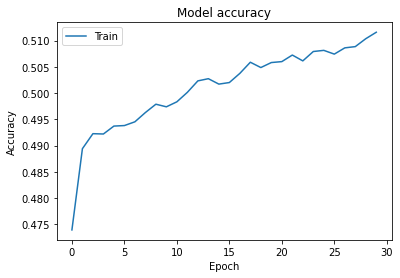

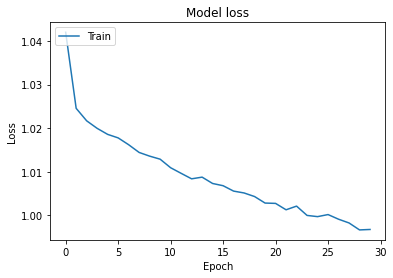

394/394 [==============================] - 1s 1ms/step


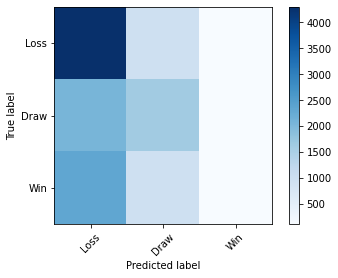

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['Loss', 'Draw', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Draw', 'Win'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [8]:
# Load new data
new_data = pd.read_csv('/content/drive/MyDrive/Dataset_0.csv')

# Preprocess new data using the same preprocessor object used on the training data
new_data[num_features] = scaler.transform(new_data[num_features])
new_data = preprocessor.transform(new_data)

# Make predictions on new data
# Make predictions on new data
predictions = model.predict(new_data)

# Convert predictions to original labels
predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Handle unknown labels
predicted_labels[pd.isnull(predicted_labels)] = 'unknown'
predicted_labels = predicted_labels.astype(str)

# Replace 'unknown' with a specified value
# Replace 'X' with a specified value
predicted_labels[predicted_labels == 'X'] = '0'

# Convert the labels to integers
id_predicted_labels = predicted_labels.astype(int)

np.set_printoptions(threshold=np.inf)
print(id_predicted_labels)


2063/2063 [==============================] - 3s 1ms/step
[1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 0 2 1 1 1 1 2 1 1 2 1 1 1 2 2 1 1 1
 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 0 1 0 1 1 2 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 2 2 1 1 1 1 1 0 1 2 1 2 1 0 1 1 2 1 1 1 2 1 2 1 2 1 1 1 1 2 1 2 1
 2 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 0 2 1 1 2 1 2 1 2 2 1 2 2 1 2 1 1 1 1 1
 1 2 0 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 1 2 2
 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 1 1 1 2 1 1 2 1 2 2 1 1 2 2 2 1
 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1
 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 1 1 1 2 1 1 1 1 1
 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 2 

In [8]:
# Get the original features for a single row
original_row = {'season_teams_count': 28, 'team_1_xg90_performance': 1.2384119, 'team_2_xg90_performance': 1.5137178, 
                'team_1_xga90_performance':1.0820477, 'team_2_xga90_performance':1.3592027, 'team_1_tsr_avg': 0.6, 
                'team_2_tsr_avg': 0.5, 'team1_all_classic_xgsh': 220, 'team1_all_classic_xgash': 10, 
                'team1_all_classic_gdxgd': -5, 'team1_all_classic_wins': 3, 'team1_all_classic_draw': 1, 
                'team1_all_classic_defeat': 10, 'team1_all_xg90_draw_xgxga': 0.5, 'team1_all_xg90_zero_xgxga': 0.1, 
                'team1_all_xg90_com_xgxga': 0.8, 'team2_all_classic_xgd': 2, 'team2_all_classic_gdxgd': 1, 
                'team2_all_classic_xp': 10, 'team2_all_classic_minutes': 1800, 'team2_all_xg90_draw_xga90': 0.8, 
                'team2_all_xg90_draw_xgxga': 0.4, 'team2_all_xg90_cxp_xg90': 0.2, 'team2_all_xg90_cop_xg90': 0.3, 
                'team2_all_five_draw_xg90': 1, 'team_1_points_difference4': -3, 'team_2_points_difference4': 10, 
                'team_1_xg90_performance_diff4': 0.2, 'team_2_xg90_performance_diff4': -0.1, 
                'team_1_xga90_performance_diff4': -0.1, 'team_2_xga90_performance_diff4': 0.1, 
                'team_1_lucky_l4': 1, 'team_2_lucky_l4': 0, 'position_class_team_1': 'D', 
                'position_class_team_2': 'D', 'diff_points_class': 'B2'}

# Put the original features in a DataFrame
row_df = pd.DataFrame(original_row, index=[0])

# Scale the numerical features using the same StandardScaler object
row_df[num_features] = scaler.transform(row_df[num_features])

# One-hot encode the categorical features using the same OneHotEncoder and ColumnTransformer objects
row_encoded = preprocessor.transform(row_df)

# Call the predict method of the trained model and pass the preprocessed input as an argument
predicted_label = model.predict(row_encoded)

# Get the index of the class with the highest probability
predicted_labels_encoded = np.argmax(predicted_label, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded) 

# Handle unknown labels
predicted_labels[pd.isnull(predicted_labels)] = 'unknown'
predicted_labels = predicted_labels.astype(str)

# Replace 'unknown' with a specified value
# Replace 'X' with a specified value
predicted_labels[predicted_labels == 'X'] = '0'

# Convert the labels to integers
predicted_labels = predicted_labels.astype(int)
print(predicted_labels)